<a href="https://colab.research.google.com/github/jee365/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_6~7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. 케라스(Keras)

### 06. 모델 저장 및 불러오기

#### 6-1 모델을 파일로 저장

In [4]:
import tensorflow as tf
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             #노드 = 10개(클래스 개수와 동일)
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [7]:
model.fit(x_train, y_train,
          #검증 셋 지정(투플 형태)
          validation_data = (x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2280 - accuracy: 0.9315 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0946 - accuracy: 0.9713 - val_loss: 0.0959 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.0801 - val_accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.0831 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0415 - accuracy: 0.9857 - val_loss: 0.0936 - val_accuracy: 0.9739
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0706 - val_accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0821 - val_accuracy

In [8]:
#모델을 h5 포맷으로 저장
model.save('h5-model.h5')

### 6-2 저장된 모델 복원

In [9]:
#모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
#모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc:{acc:.5f}')

h5 model] loss: 0.08960, acc:0.97830


In [11]:
#모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [12]:
#모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
#모델 검증(HDF5)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc:{acc:.5f}')

#모델 검증(SavedModel)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved model] loss: {loss:.5f}, acc:{acc:.5f}')

h5 model] loss: 0.08960, acc:0.97830
saved model] loss: 0.08960, acc:0.97830


## 07. 복잡한 모델 생성

### 7-1 함수형 API(Functional API)

<Functional API 구조>

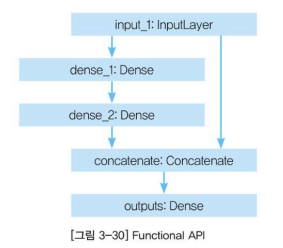

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [15]:
#모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28,28), name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)


In [16]:
#모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


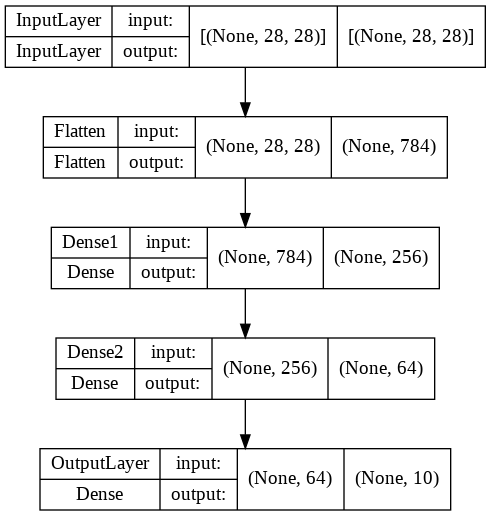

In [17]:
from tensorflow.keras.utils import plot_model
#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [18]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2118 - accuracy: 0.9379
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0871 - accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9809


In [19]:
#검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional model] loss: {loss:.5f}, acc:{acc:.5f}')

Functional model] loss: 0.07662, acc:0.97600


### 7-2 모델 서브클래싱

텐서플로에서 제공하는 Model 클래스를 직접 상속받아 사용자가 서브클래스로 딥러닝 모델을 만들 수 있다.

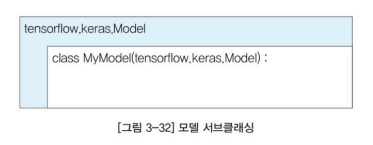

In [25]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


In [26]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [27]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing model] loss: {loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2085 - accuracy: 0.9381
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9731
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9821
Subclassing model] loss: 0.08397, acc:0.97500


## 7-3 서브클래싱 모델 파라미터를 활용한 생성

In [28]:
class MyModel(tf.keras.Model):
    
    #생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [29]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [30]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing model w.parameters] loss: {loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2191 - accuracy: 0.9360
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883 - accuracy: 0.9720
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0615 - accuracy: 0.9798
Subclassing model w.parameters] loss: 0.07137, acc:0.97720
